# Dose and transmission estimations

2022/12/14

Sam Tardif, samuel.tardif@cea.fr

Thibaut Jousseaume, thibaut.jousseaume@cea.fr

In [1]:
from dose_estimation import Beam, Material, Layer, Stacking

%matplotlib notebook

<IPython.core.display.Javascript object>


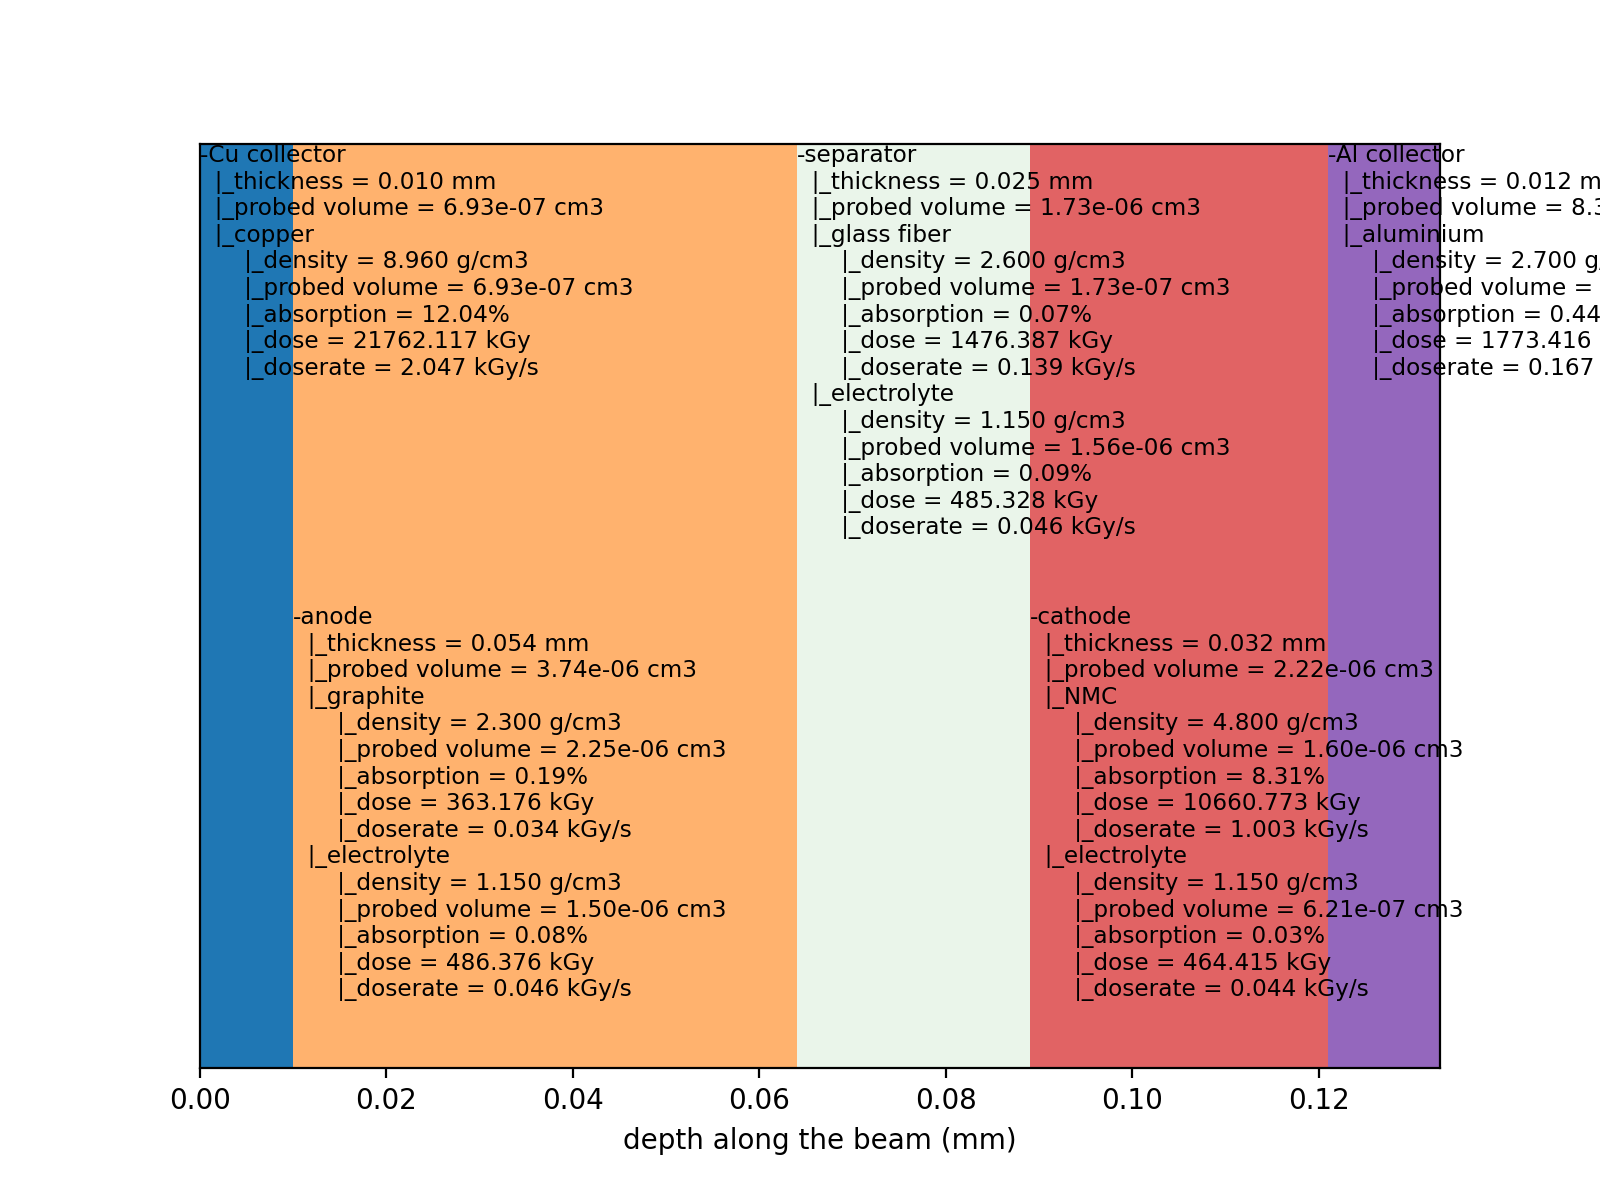

-Cu collector
  |_thickness = 0.010 mm
  |_probed volume = 6.93e-07 cm3
  |_copper
      |_density = 8.960 g/cm3
      |_probed volume = 6.93e-07 cm3
      |_absorption = 12.04%
      |_dose = 21762.117 kGy
      |_doserate = 2.047 kGy/s
-anode
  |_thickness = 0.054 mm
  |_probed volume = 3.74e-06 cm3
  |_graphite
      |_density = 2.300 g/cm3
      |_probed volume = 2.25e-06 cm3
      |_absorption = 0.19%
      |_dose = 363.176 kGy
      |_doserate = 0.034 kGy/s
  |_electrolyte
      |_density = 1.150 g/cm3
      |_probed volume = 1.50e-06 cm3
      |_absorption = 0.08%
      |_dose = 486.376 kGy
      |_doserate = 0.046 kGy/s
-separator
  |_thickness = 0.025 mm
  |_probed volume = 1.73e-06 cm3
  |_glass fiber
      |_density = 2.600 g/cm3
      |_probed volume = 1.73e-07 cm3
      |_absorption = 0.07%
      |_dose = 1476.387 kGy
      |_doserate = 0.139 kGy/s
  |_electrolyte
      |_density = 1.150 g/cm3
      |_probed volume = 1.56e-06 cm3
      |_absorption = 0.09%
      |_dose = 4

In [2]:
#-------------------------------------------------------------------------------------------------
# X-RAY BEAM
# Beam is an object describing the X-ray beam.
# beamEnergy in eV
# photonFlux in photon/s
# beamWidth in um
# beamHeight in um
# exposure in s
xr = Beam(beamEnergy = 27000, 
          photonFlux = 2.44E10, 
          beamWidth = 630, 
          beamHeight = 110,
          exposure = 1050*27*.375)
#-------------------------------------------------------------------------------------------------
# CURRENT COLLECTOR ANODE
# Layer is an object to build a layer of a solid and a liquid material.
# density in g/cm3
# thickness in mm
# porosity unitless (0 <= porosity <= 1)
current_collector_anode = Layer(name = "Cu collector",
                                solidMaterial = Material(name = "copper", formula = "Cu", density = 8.96), 
                                liquidMaterial = None, 
                                thickness = 0.010, 
                                porosity = 0.0)
#-------------------------------------------------------------------------------------------------
# ANODE
anode = Layer(name = "anode",
              solidMaterial = Material(name = "graphite", formula = "C", density = 2.3), 
              liquidMaterial = Material(name = "electrolyte", formula = "C3H6O3", density = 1.15), 
              thickness = 0.054, 
              porosity = 0.40)
#-------------------------------------------------------------------------------------------------
# SEPARATOR
separator = Layer(name = "separator",
                  solidMaterial = Material(name = "glass fiber", formula = "SiO2", density = 2.6), 
                  liquidMaterial = Material(name = "electrolyte", formula = "C3H6O3", density = 1.15),
                  thickness = 0.025,
                  porosity = 0.90)
#-------------------------------------------------------------------------------------------------
# CATHODE
cathode = Layer(name = "cathode",
                solidMaterial = Material(name = "NMC", formula = "LiNi0.8Mn0.1Co0.1O2", density = 4.8),
                liquidMaterial = Material(name = "electrolyte", formula = "C3H6O3", density = 1.15),
                thickness = 0.032,
                porosity = 0.28)
#-------------------------------------------------------------------------------------------------
# CURRENT COLLECTOR CATHODE
current_collector_cathode = Layer(name = "Al collector",
                                solidMaterial = Material(name = "aluminium", formula = "Al", density = 2.7), 
                                liquidMaterial = None, 
                                thickness = 0.012, 
                                porosity = 0.0)
#-------------------------------------------------------------------------------------------------
# BUILD THE CELL (in downstream order, i.e. first the component where the beam enters)
pouch_cell = Stacking([current_collector_anode, anode, separator, cathode, current_collector_cathode])
#-------------------------------------------------------------------------------------------------
# COMPUTE
pouch_cell.get_dose(xr)
#-------------------------------------------------------------------------------------------------
# VISUALIZE    
fig,ax = pouch_cell.get_visual_dose()